In [ ]:
!pip install scikit-learn

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import metrics

from google.colab import files
uploaded = files.upload()

Saving Salary (1).xlsx to Salary (1) (1).xlsx


In [14]:
import io
df = pd.read_excel(io.BytesIO(uploaded['Salary (1).xlsx']))
df.head()

,Unnamed: 0,Name,LastName,Age,Role,HomeAddress,Salary,Promoted,Seniority
0,0,John,Stott,10,AI,California,0,No,0.0
1,1,Jack,Mcbride,20,AI,California,1200,Yes,3.0
2,2,Angelica,Newman,15,Web,Florida,500,No,1.0
3,3,Andrew,Hines,15,Mobile,Florida,500,No,2.0
4,4,Chizi,Osi,25,Flutter,California,1500,Yes,4.0


In [ ]:
df.describe()

,Unnamed: 0,Age,Salary,Seniority
count,7.000000,7.000000,7.000000,6.000000
mean,3.000000,18.714286,928.571429,2.166667
std,2.160247,5.618846,590.802521,1.471960
min,0.000000,10.000000,0.000000,0.000000
25%,1.500000,15.000000,500.000000,1.250000
50%,3.000000,20.000000,1200.000000,2.500000
75%,4.500000,23.000000,1400.000000,3.000000
max,6.000000,25.000000,1500.000000,4.000000


In [14]:
df.head()

,Unnamed: 0,Name,LastName,Age,Role,HomeAddress,Salary,Promoted,Seniority
0,0,John,Stott,10,AI,California,0,No,0.0
1,1,Jack,Mcbride,20,AI,California,1200,Yes,3.0
2,2,Angelica,Newman,15,Web,Florida,500,No,1.0
3,3,Andrew,Hines,15,Mobile,Florida,500,No,2.0
4,4,Chizi,Osi,25,Flutter,California,1500,Yes,4.0


In [15]:
df.corr()

,Unnamed: 0,Age,Salary,Seniority
Unnamed: 0,1.000000,0.782660,0.744351,0.689959
Age,0.782660,1.000000,0.986915,0.972796
Salary,0.744351,0.986915,1.000000,0.967134
Seniority,0.689959,0.972796,0.967134,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   7 non-null      int64  
 1   Name         7 non-null      object 
 2   LastName     7 non-null      object 
 3   Age          7 non-null      int64  
 4   Role         7 non-null      object 
 5   HomeAddress  7 non-null      object 
 6   Salary       7 non-null      int64  
 7   Promoted     7 non-null      object 
 8   Seniority    6 non-null      float64
dtypes: float64(1), int64(3), object(5)
memory usage: 632.0+ bytes


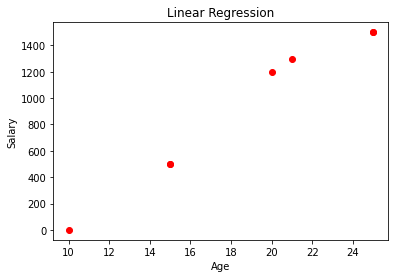

In [30]:

plt.scatter(df["Age"], df["Salary"], color='r')
plt.title("Linear Regression")
plt.ylabel("Salary")
plt.xlabel("Age")
plt.show()

In [16]:
df.isnull().sum()

Unnamed: 0     0
Name           0
LastName       0
Age            0
Role           0
HomeAddress    0
Salary         0
Promoted       0
Seniority      1
dtype: int64

In [17]:
df.dropna()

,Unnamed: 0,Name,LastName,Age,Role,HomeAddress,Salary,Promoted,Seniority
0,0,John,Stott,10,AI,California,0,No,0.0
1,1,Jack,Mcbride,20,AI,California,1200,Yes,3.0
2,2,Angelica,Newman,15,Web,Florida,500,No,1.0
3,3,Andrew,Hines,15,Mobile,Florida,500,No,2.0
4,4,Chizi,Osi,25,Flutter,California,1500,Yes,4.0
5,5,George,Mike,21,AI,California,1300,Yes,3.0


In [21]:
df['Seniority'].fillna(df['Seniority'].mean(), inplace=True)








In [22]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import metrics

X= df[["Age", "Seniority"]]
y= df["Salary"]

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.35,random_state=40)

lin_reg= LinearRegression()
lin_reg.fit(X_train,y_train)
predicted= lin_reg.predict(X_test)

print("MSE", mean_squared_error(y_test, predicted))
print("R squared", metrics.r2_score(y_test, predicted))

MSE 26666.666666666668
R squared 0.7894736842105263


In [31]:
lin_reg.score(X_test,y_test)

0.7894736842105263

In [18]:
lin_reg.coef_

array([0.009999  , 0.99990001])

In [19]:
lin_reg.intercept_

-0.09999000100003741